In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
print(type(train_dataset))
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [5]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [8]:
print(type(train_dataset))
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PaddedBatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PaddedBatchDataset'>


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 117s 268ms/step - loss: 0.5901 - accuracy: 0.6851 - val_loss: 0.6464 - val_accuracy: 0.6516
Epoch 2/10
391/391 [==============================] - 103s 261ms/step - loss: 0.4668 - accuracy: 0.7895 - val_loss: 0.4733 - val_accuracy: 0.7800
Epoch 3/10
391/391 [==============================] - 106s 269ms/step - loss: 0.4329 - accuracy: 0.8032 - val_loss: 0.5409 - val_accuracy: 0.7646
Epoch 4/10
391/391 [==============================] - 106s 270ms/step - loss: 0.3334 - accuracy: 0.8642 - val_loss: 0.3913 - val_accuracy: 0.8333
Epoch 5/10
391/391 [==============================] - 105s 265ms/step - loss: 0.2333 - accuracy: 0.9139 - val_loss: 0.3504 - val_accuracy: 0.8510
Epoch 6/10
391/391 [==============================] - 105s 266ms/step - loss: 0.1804 - accuracy: 0.9366 - val_loss: 0.3614 - val_accuracy: 0.8648
Epoch 7/10
391/391 [==============================] - 105s 265ms/step - loss: 0.1364 - accuracy: 0.9555 - val_loss: 0.4003 -

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

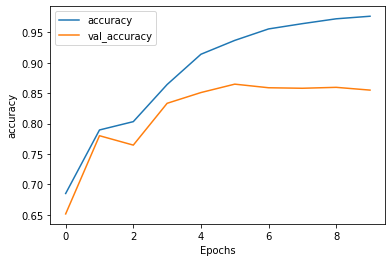

In [15]:
plot_graphs(history, 'accuracy')

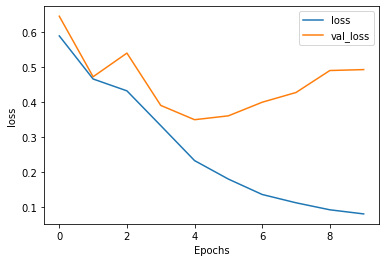

In [16]:
plot_graphs(history, 'loss')